### Sarcasm Headlines Dataset -`NLP`

### Imports

In [1]:
import json
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import seaborn as sns
from collections import Counter
import re
from nltk.corpus import stopwords
import numpy as np
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Data Prep

In [2]:
class HeadLine:
    def __init__(self, headline, is_sarcastic):
        self.is_sarcastic = is_sarcastic
        self.headline = headline

In [3]:
news = []
with open('Sarcasm_Headlines_Dataset.json', 'r') as reader:
    for line in reader:
        res = json.loads(line)
        headline = HeadLine(res["headline"], res["is_sarcastic"])
        news.append(headline)

In [4]:
news[0].headline

"former versace store clerk sues over secret 'black code' for minority shoppers"

> Split labels and features

In [5]:
X = np.array([i.headline for i in news])
y = np.array([i.is_sarcastic for i in news])

### Features Cleaning

> We may want to remove stopword, punctuations, numbers, from our headlines.

In [6]:
X[:5]

array(["former versace store clerk sues over secret 'black code' for minority shoppers",
       "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
       "mom starting to fear son's web series closest thing she will have to grandchild",
       'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
       'j.k. rowling wishes snape happy birthday in the most magical way'],
      dtype='<U254')

In [7]:
test = "j.k. rowling wishes snape happy birthday in the most magical way 15,"

In [8]:
stopwords = stopwords.words('english')

In [9]:
X_cleaned_1 = []
for sent in X: 
    a = re.sub(r'\d', ' ', sent) # remove digits
    b = re.sub(r'\W', ' ', a) # non-word characters
    c = re.sub(r'\b[a-zA-Z]{1}\b', ' ', b) ## remove single characters like `j`
    d = re.sub(r'\s+', ' ', c).strip().lower() # double spacing and trim
    X_cleaned_1.append(d)

> removing stopwords

In [10]:
X_cleaned_2 = [
]

for sent in X_cleaned_1:
    X_cleaned_2.append(" ".join([word for word in word_tokenize(sent) if word not in stopwords]))


> Splitting the data into training and testing.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned_2, y, test_size=.2, random_state=42)

In [12]:
Counter(y_train)

Counter({1: 9378, 0: 11989})

### Create Word Vectors

> **OOV** - **O**ut **O**f **V**ocabulary * let's say we have a new word that is in our testing set and this word never apppeared in the during creating word indes we can use out of vacabulary to create a token for that and replaces words that it doesn’t recognize with the out of vocabulary token instead. It’s simple but effective.

> Finding total unique words in the corpus

In [13]:
counter = Counter()

for sent in X_cleaned_2:
    words = word_tokenize(sent)
    for word in words:
        counter[word] +=1
counter

Counter({'former': 106,
         'versace': 1,
         'store': 57,
         'clerk': 12,
         'sues': 17,
         'secret': 92,
         'black': 268,
         'code': 19,
         'minority': 15,
         'shoppers': 3,
         'roseanne': 3,
         'revival': 11,
         'catches': 14,
         'thorny': 3,
         'political': 83,
         'mood': 13,
         'better': 124,
         'worse': 40,
         'mom': 220,
         'starting': 45,
         'fear': 46,
         'son': 134,
         'web': 19,
         'series': 62,
         'closest': 7,
         'thing': 144,
         'grandchild': 2,
         'boehner': 30,
         'wants': 139,
         'wife': 94,
         'listen': 24,
         'come': 105,
         'alternative': 13,
         'debt': 29,
         'reduction': 4,
         'ideas': 43,
         'rowling': 9,
         'wishes': 42,
         'snape': 2,
         'happy': 64,
         'birthday': 64,
         'magical': 32,
         'way': 268,
         'adva

In [14]:
unique_words = len(counter)
unique_words

24743

In [15]:
tokenizer = Tokenizer(num_words=unique_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [16]:
word_index = tokenizer.word_index

In [17]:
word_index 

{'<OOV>': 1,
 'trump': 2,
 'new': 3,
 'man': 4,
 'one': 5,
 'year': 6,
 'report': 7,
 'donald': 8,
 'area': 9,
 'woman': 10,
 'day': 11,
 'says': 12,
 'time': 13,
 'obama': 14,
 'first': 15,
 'world': 16,
 'like': 17,
 'people': 18,
 'old': 19,
 'nation': 20,
 'get': 21,
 'women': 22,
 'life': 23,
 'make': 24,
 'house': 25,
 'still': 26,
 'clinton': 27,
 'white': 28,
 'back': 29,
 'family': 30,
 'could': 31,
 'black': 32,
 'americans': 33,
 'way': 34,
 'study': 35,
 'gop': 36,
 'would': 37,
 'school': 38,
 'show': 39,
 'best': 40,
 'really': 41,
 'years': 42,
 'american': 43,
 'america': 44,
 'president': 45,
 'watch': 46,
 'police': 47,
 'last': 48,
 'home': 49,
 'going': 50,
 'bill': 51,
 'good': 52,
 'mom': 53,
 'state': 54,
 'death': 55,
 'know': 56,
 'health': 57,
 'finds': 58,
 'say': 59,
 'video': 60,
 'right': 61,
 'parents': 62,
 'things': 63,
 'love': 64,
 'hillary': 65,
 'party': 66,
 'may': 67,
 'kids': 68,
 'every': 69,
 'big': 70,
 'child': 71,
 'campaign': 72,
 'getting'

In [18]:
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

In [19]:
X_train_tokens[:7]

[[2239, 283, 608, 4, 759, 12229],
 [513, 3773, 3774, 18, 389, 533],
 [7, 6836, 564, 2077, 108, 69, 144, 1403],
 [4224, 201, 3, 1754, 8668, 102],
 [390, 820, 129, 163, 3398, 1568],
 [3399, 3775, 7, 425, 5604, 111, 291, 726, 697],
 [6837, 2864, 3400, 1163, 2634]]

In [20]:
max_len = 100
X_train_tokens_padded = pad_sequences(X_train_tokens, maxlen=max_len, padding="post", truncating="post")
X_test_tokens_padded = pad_sequences(X_test_tokens, maxlen=max_len, padding="post", truncating="post")

In [21]:
X_train_tokens_padded.shape

(21367, 100)

### Model Creation `RNN`

In [43]:
model = keras.Sequential([
    keras.layers.Embedding(unique_words, 16, input_length = max_len),
    keras.layers.LSTM(64, dropout=.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

### Model Creation `CNN`

In [56]:
model  = tf.keras.Sequential([
            keras.layers.Embedding(unique_words, 16, input_length = max_len),
            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Dense(24, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
])

In [61]:
model.compile(
    loss = keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

In [62]:
EPOCHS = 5
VERBOSE = 1
VALIDATION_SPLIT = .2
BATCH_SIZE = 50

history = model.fit(
    X_train_tokens_padded,
    y_train,
    epochs = EPOCHS,
    verbose = VERBOSE,
    validation_split = VALIDATION_SPLIT,
    batch_size = BATCH_SIZE
)

Epoch 1/5
342/342 [==============================] - 5s 13ms/step - loss: 0.0853 - accuracy: 0.9739 - val_loss: 0.6043 - val_accuracy: 0.7897
Epoch 2/5
342/342 [==============================] - 4s 12ms/step - loss: 0.0710 - accuracy: 0.9790 - val_loss: 0.6554 - val_accuracy: 0.7864
Epoch 3/5
342/342 [==============================] - 4s 12ms/step - loss: 0.0631 - accuracy: 0.9823 - val_loss: 0.6834 - val_accuracy: 0.7861
Epoch 4/5
342/342 [==============================] - 4s 12ms/step - loss: 0.0578 - accuracy: 0.9814 - val_loss: 0.7230 - val_accuracy: 0.7866
Epoch 5/5
342/342 [==============================] - 4s 12ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.7640 - val_accuracy: 0.7857


In [63]:
model.evaluate(X_test_tokens_padded, y_test, verbose=1)

167/167 [==============================] - 0s 1ms/step - loss: 0.7584 - accuracy: 0.7890


[0.758443295955658, 0.7890303134918213]

In [64]:
history.history

{'loss': [0.0866798609495163,
  0.07575371116399765,
  0.06483783572912216,
  0.05770331993699074,
  0.050969794392585754],
 'accuracy': [0.9721523523330688,
  0.976715624332428,
  0.9800503253936768,
  0.9819809198379517,
  0.9853741526603699],
 'val_loss': [0.6042777895927429,
  0.6553656458854675,
  0.683415412902832,
  0.7230066657066345,
  0.7639601826667786],
 'val_accuracy': [0.7896584272384644,
  0.786382794380188,
  0.7861487865447998,
  0.7866167426109314,
  0.785680890083313]}

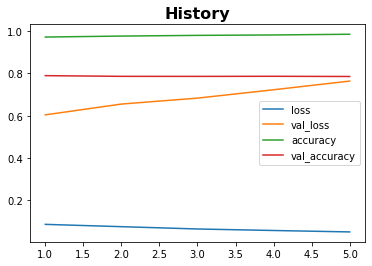

In [65]:
def plotHistory(history):
    x = np.array([i+1 for i in range(EPOCHS)])
    
    plt.title("History", fontsize=16, fontweight='bold')
    plt.plot(x, history["loss"], label='loss')
    plt.plot(x, history["val_loss"], label='val_loss')
    
    plt.plot(x, history["accuracy"], label='accuracy')
    plt.plot(x, history["val_accuracy"], label='val_accuracy')
    
    plt.legend()
    plt.show()
plotHistory(history.history)

In [50]:
predictions = model.predict(X_test_tokens_padded[:30])

In [66]:
predictions[:2]

array([[0.43263602],
       [0.43263602]], dtype=float32)

In [67]:
np.round(predictions.reshape(-1)), y_test[:30]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 0]))

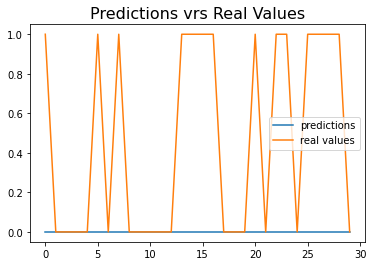

In [68]:
plt.plot(np.round(predictions.reshape(-1)), label="predictions")
plt.plot(y_test[:30], label="real values")
plt.title("Predictions vrs Real Values", fontsize=16)
plt.legend()
plt.show()

In [69]:
model.predict(X_test_tokens_padded[:2]), y_test[:2]

(array([[9.9994159e-01],
        [2.7170777e-04]], dtype=float32),
 array([1, 0]))